In [2]:
# !mkdir datasets
# !kaggle datasets download shariful07/student-mental-health

In [3]:
# import zipfile

# with zipfile.ZipFile('student-mental-health.zip', 'r') as f:
#     f.extractall('datasets/')

In [4]:
import pandas as pd

df = pd.read_csv('datasets/Student Mental health.csv')

df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


## 🌟 Exercise 1 : Visualizing the Distribution of CGPA

In [5]:
# Create a histogram to visualize the distribution of students’ CGPA.

# Dataset Overview: The CGPA of students is categorized into different ranges. This exercise will help us understand the overall academic performance distribution among the students.

# Tasks:

# Import necessary libraries.
# Load the dataset into a pandas DataFrame. (For the purpose of this exercise, let’s assume the DataFrame is already loaded and named df).
# Use Seaborn’s histplot to create a histogram of the CGPA categories.
# Customize the histogram with an appropriate color and add a title.
# Display the plot.

In [6]:
df.columns
"""
    ['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
    'Your current year of Study', 'What is your CGPA?', 'Marital status',
    'Do you have Depression?', 'Do you have Anxiety?',
    'Do you have Panic attack?',
    'Did you seek any specialist for a treatment?']
"""

"\n    ['Timestamp', 'Choose your gender', 'Age', 'What is your course?',\n    'Your current year of Study', 'What is your CGPA?', 'Marital status',\n    'Do you have Depression?', 'Do you have Anxiety?',\n    'Do you have Panic attack?',\n    'Did you seek any specialist for a treatment?']\n"

In [7]:
df['What is your CGPA?'].unique()


array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

In [8]:
df['What is your CGPA?'] = df['What is your CGPA?'].replace('3.50 - 4.00 ', '3.50 - 4.00')


In [9]:
cgpa_order = df['What is your CGPA?'].unique()
cgpa_order.sort()
cgpa_order

array(['0 - 1.99', '2.00 - 2.49', '2.50 - 2.99', '3.00 - 3.49',
       '3.50 - 4.00'], dtype=object)

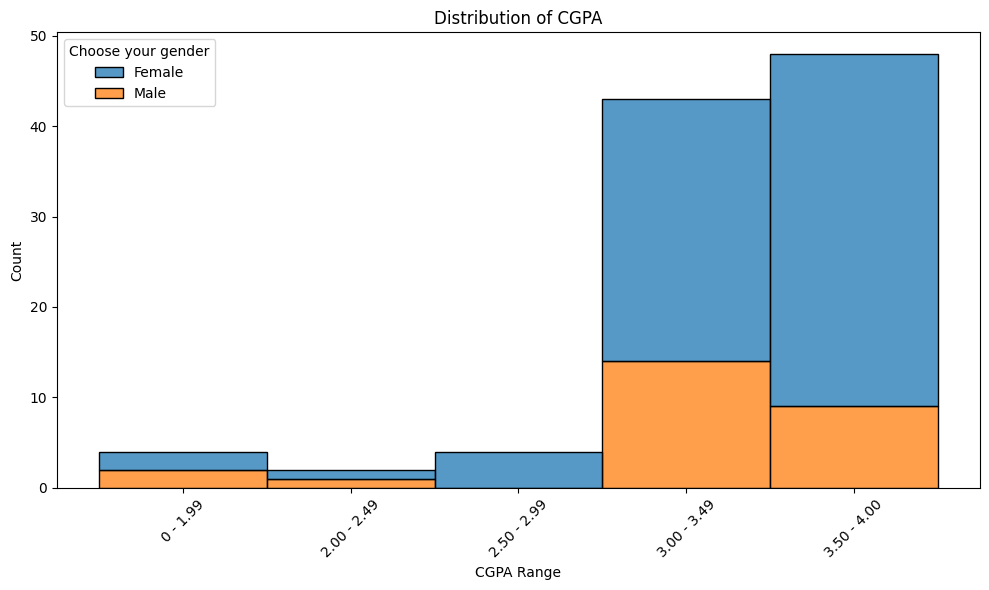

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the desired order of CGPA categories
cgpa_order = ['0 - 1.99', '2.00 - 2.49', '2.50 - 2.99', '3.00 - 3.49', '3.50 - 4.00']

# Convert CGPA to categorical type with specified order
df['CGPA_ordered'] = pd.Categorical(df['What is your CGPA?'], categories=cgpa_order, ordered=True)

fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=df, x='CGPA_ordered', hue='Choose your gender',
             multiple='stack', palette='tab10')
plt.title('Distribution of CGPA')
plt.xlabel('CGPA Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

## 🌟 Exercise 2: Comparing Anxiety Levels Across Different Genders


In [11]:
# Dataset Overview: The dataset includes a ‘Do you have Anxiety?’ column with 
# responses and a ‘Choose your gender’ column.

# Tasks:

# Import necessary libraries.
# Assuming the dataset is loaded into df, create a bar plot using Seaborn to compare anxiety levels across genders.
# Customize your plot with an appropriate color palette.
# Add a title to your plot.
# Display the plot.

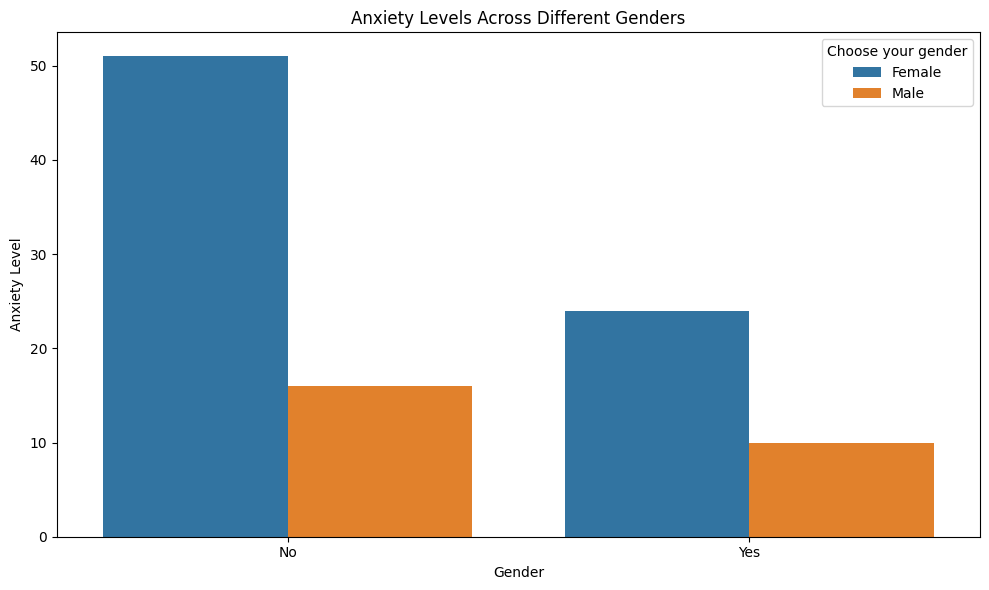

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))

# It feels like bar plot is not the best choise to show this relationship
sns.countplot(data=df, x='Do you have Anxiety?', hue='Choose your gender')
plt.title('Anxiety Levels Across Different Genders')
plt.xlabel('Gender')
plt.ylabel('Anxiety Level')
plt.xticks(rotation=0)
plt.tight_layout()

## 🌟 Exercise 3: Exploring the Relationship Between Age and Panic Attacks


In [13]:
# Create a scatter plot to explore if there’s any visible relationship
# between students’ age and the occurrence of panic attacks.

# Dataset Overview: The dataset records students’ ages and their 
# responses to whether they have experienced panic attacks.

# Tasks:

# Import necessary libraries.
# Use Seaborn’s scatterplot to create a scatter plot with age on 
# the x-axis and the occurrence of panic attacks on the y-axis. 
# For simplicity, convert panic attack responses to numeric 
# (e.g., Yes=1, No=0).
# Customize the scatter plot to improve readability.
# Add a title.
# Display the plot.

In [14]:

df['Do you have Panic attack?'].unique()

array(['Yes', 'No'], dtype=object)

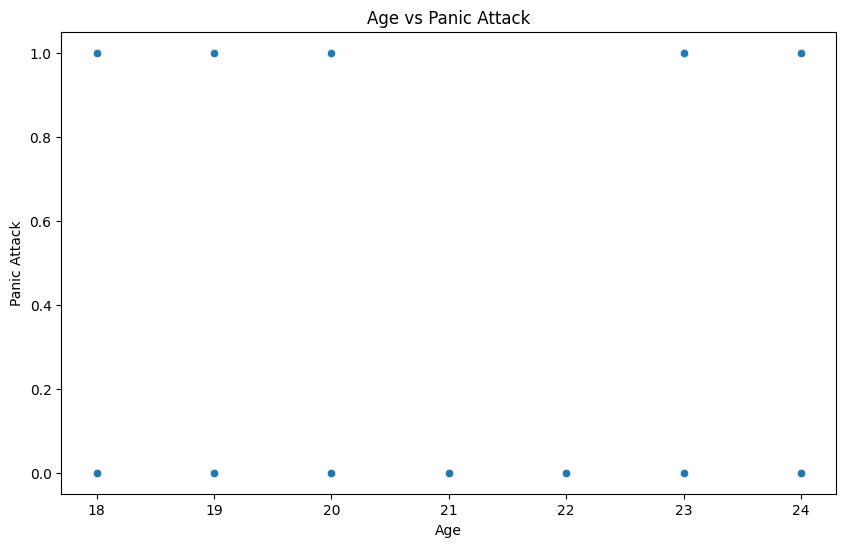

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))

df['panic_attack_flag'] = df['Do you have Panic attack?'].apply(lambda x: 1 if x == 'Yes' else 0)

sns.scatterplot(data=df, x='Age', y='panic_attack_flag')
plt.title('Age vs Panic Attack')
plt.xlabel('Age')
plt.ylabel('Panic Attack')

plt.show()

# Scatter plot fills like a questionable choise. And it doesn't help see the relationship


In [16]:
df.describe(include='all')

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,CGPA_ordered,panic_attack_flag
count,101,101,100.00000,101,101,101,101,101,101,101,101,101,101.000000
unique,92,2,NaN,49,7,5,2,2,2,2,2,5,NaN
top,8/7/2020 12:39,Female,NaN,BCS,year 1,3.50 - 4.00,No,No,No,No,No,3.50 - 4.00,NaN
freq,3,75,NaN,18,41,48,85,66,67,68,95,48,NaN
mean,NaN,NaN,20.53000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.326733
std,NaN,NaN,2.49628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.471358
min,NaN,NaN,18.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,18.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,19.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,23.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 13 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Timestamp                                     101 non-null    object  
 1   Choose your gender                            101 non-null    object  
 2   Age                                           100 non-null    float64 
 3   What is your course?                          101 non-null    object  
 4   Your current year of Study                    101 non-null    object  
 5   What is your CGPA?                            101 non-null    object  
 6   Marital status                                101 non-null    object  
 7   Do you have Depression?                       101 non-null    object  
 8   Do you have Anxiety?                          101 non-null    object  
 9   Do you have Panic attack?                     101 non-

In [18]:
df = df[df['Age'].notna()]


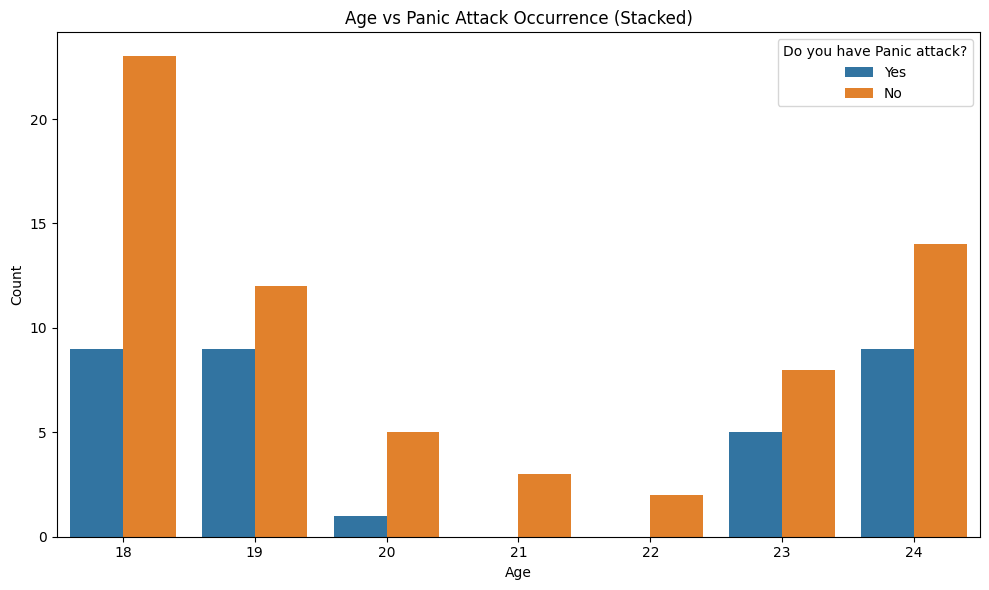

In [19]:
# Count plot seems like one of the best option
fig, ax = plt.subplots(figsize=(10, 6))

sns.countplot(data=df, x=df['Age'].astype(int), hue='Do you have Panic attack?')
plt.title('Age vs Panic Attack Occurrence (Stacked)')
plt.xlabel('Age')
plt.ylabel('Count')

plt.tight_layout()

In [20]:
# 🌟 Exercise 4: Visualizing Pairwise Relationships with Seaborn Pair Plot


In [21]:
# Utilize Seaborn’s pairplot function to visualize the pairwise relationships
# and distributions across multiple variables in the dataset.

# Scenario: You’re interested in understanding the relationships between students’ ages, CGPAs, and their mental health status regarding depression, anxiety, and panic attacks.

# Tasks:

# Select a subset of columns relevant to the exercise: Age, CGPA, Depression, Anxiety, and Panic attacks. Assume these columns are appropriately coded as numerical values for simplicity.
# Use Seaborn’s pairplot to visualize pairwise relationships and distributions.
# Customize the plot with a hue based on one of the mental health conditions to differentiate the data points.


In [22]:
import numpy as np

def add_noise(x, eps=5e-2):
    return x + np.random.uniform(low=-eps, high=eps, size=len(x))

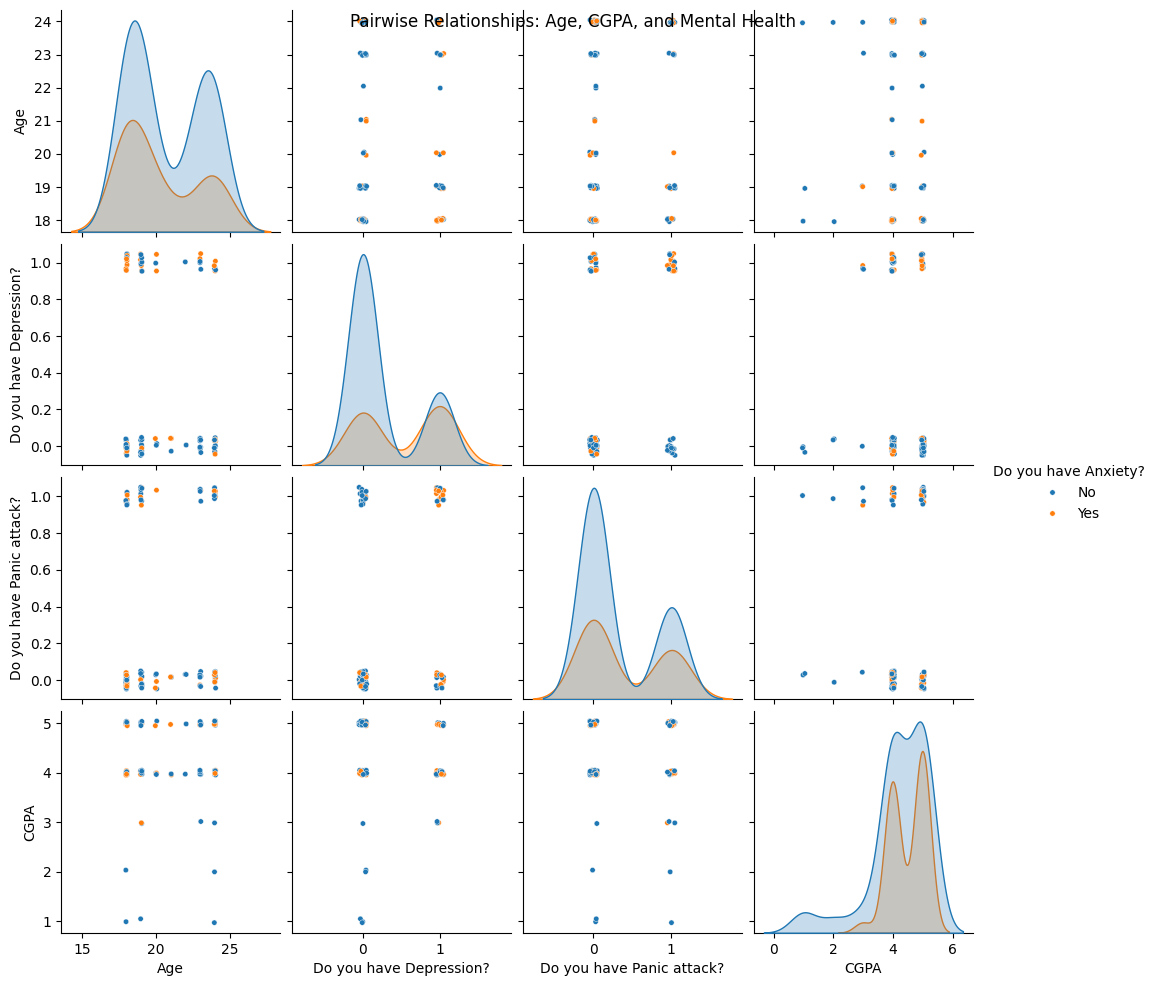

In [23]:
relevant_columns = ['Age', 'What is your CGPA?', 'Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?']
subset_df = df.loc[:, relevant_columns]

gpa_num_map = {'0 - 1.99': 1, '2.00 - 2.49': 2, '2.50 - 2.99': 3,
               '3.00 - 3.49': 4, '3.50 - 4.00': 5}

# Let's also add a little noise to the points they so don't overlap
subset_df['CGPA'] = subset_df['What is your CGPA?'].map(gpa_num_map).astype(float)
subset_df.drop(columns=['What is your CGPA?'], inplace=True)

subset_df['Age'] = subset_df['Age'].astype(float)
subset_df['Do you have Depression?'] = (subset_df['Do you have Depression?'] == 'Yes').astype(float)
subset_df['Do you have Panic attack?'] = (subset_df['Do you have Panic attack?'] == 'Yes').astype(float)

subset_eps_df = pd.concat([subset_df.drop(columns=['Do you have Anxiety?']).apply(add_noise, axis=1), subset_df['Do you have Anxiety?']], axis=1)

g = sns.pairplot(subset_eps_df, hue='Do you have Anxiety?', kind='scatter', diag_kind='kde', plot_kws={'s': 15})  # Reduced point size
plt.suptitle('Pairwise Relationships: Age, CGPA, and Mental Health')
# plt.tight_layout()

plt.show()

## 🌟 Exercise 5: Creating a Heatmap to Visualize Correlations


In [24]:
# Use Seaborn to create a heatmap that visualizes the correlation matrix 
# of students’ age, CGPA, and mental health status indicators.

# Scenario: You aim to identify any potential correlations between students’ 
# age, CGPA, and their self-reported status on depression, anxiety, and panic 
# attacks to find patterns that might need further investigation.

# Tasks:

# Calculate the correlation matrix for the selected subset of your dataset.
# Use Seaborn’s heatmap function to visualize the correlation matrix.
# Customize the heatmap for better readability (e.g., annotating the correlation coefficients).

In [25]:
subset_df.head()

,Age,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,CGPA
0,18.0,1.0,No,1.0,4.0
1,21.0,0.0,Yes,0.0,4.0
2,19.0,1.0,Yes,1.0,4.0
3,22.0,1.0,No,0.0,4.0
4,23.0,0.0,No,0.0,4.0


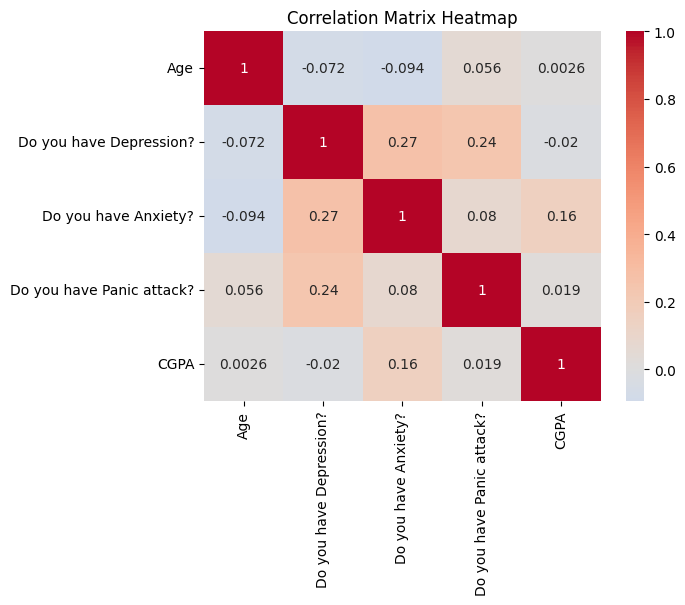

In [26]:
subset_df['Do you have Anxiety?'] = (subset_df['Do you have Anxiety?'] == 'Yes').astype(float)
correlation_matrix = subset_df.select_dtypes(include='number').corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix Heatmap")

plt.show()

## 🌟 Exercise 6: Analyzing Distributions and Relationships Using FacetGrid


In [27]:
# Explore the distribution of CGPA across different levels of depression status using Seaborn’s FacetGrid.

# Scenario: You are interested in exploring how students’ CGPA distributions vary among those who have 
# reported depression versus those who haven’t.

# Tasks:

# Use Seaborn’s FacetGrid to create a grid of histograms for CGPA, segmented by depression status.
# Map a histogram plot to each facet with appropriate customizations.
# Add titles and labels for clarity.

In [28]:
df.columns

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?', 'CGPA_ordered',
       'panic_attack_flag'],
      dtype='object')

In [31]:
df['Did you seek any specialist for a treatment?'].value_counts()

Did you seek any specialist for a treatment?
No     94
Yes     6
Name: count, dtype: int64

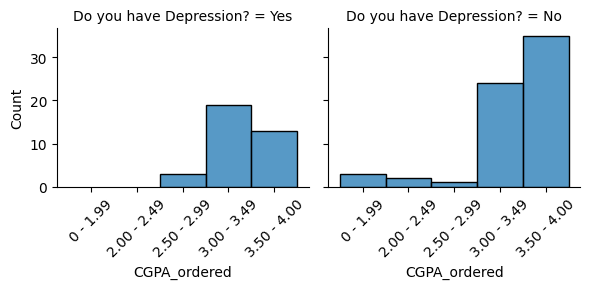

In [32]:
g = sns.FacetGrid(df, col="Do you have Depression?")
g.map(sns.histplot, "CGPA_ordered")


# We can get all axes objects to set rotation
for ax in g.axes.flat:
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()



plt.show()



